In [1]:
%matplotlib inline
import simplyP as sp

In [2]:
# Path to the Excel file containing parameters for setup and all the model parameters
params_fpath = (r'C:\Data\GitHub\SimplyP\Development\v0-2\Parameters_working.xlsx')

# Plotting options: either 'paper' or 'notebook'
fig_display_type = 'notebook'

In [3]:
# Read inputs
p_SU, dynamic_options, p, p_LU, p_SC, met_df, obs_dict = sp.read_input_data(params_fpath)

In [4]:
%%time
# Run model
df_TC_dict, df_R_dict, Kf, ode_output_dict = sp.run_simply_p(met_df, p_SU, p_LU,
                                                             p_SC, p, dynamic_options)

Kf (the soil P sorption coefficient; mm/kg): 5.4160512063023145e-06
Wall time: 4.87 s


### 4. Explore model output

The following code cells summarise the model output, saving results to csv or as graphs.

#### 4.1. Results from snow module

thde snow module is only relevant if it was called during the model run (i.e. `inc_snowmelt=='y'` in the setup Excel file).

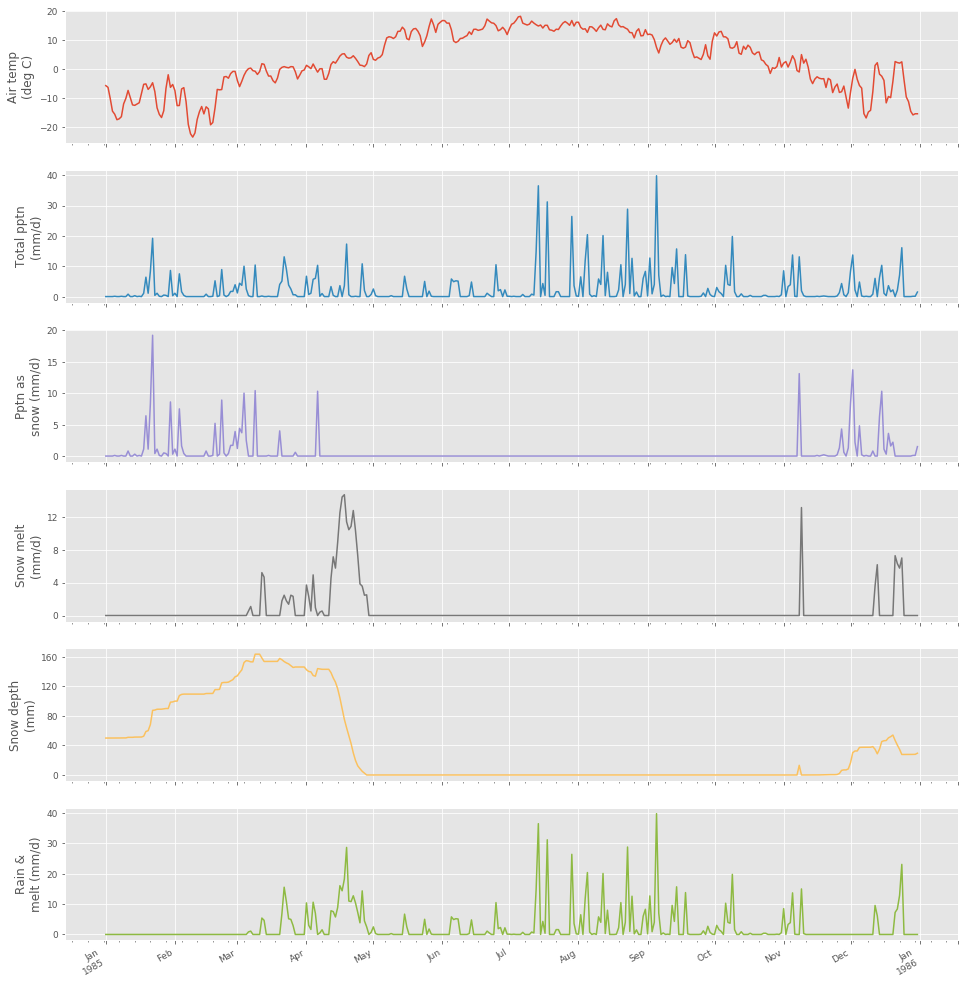

In [5]:
# Plot snowfall/melt
sp.plot_snow(met_df, p_SU, fig_display_type)

#### 4.2. Results from terrestrial processing

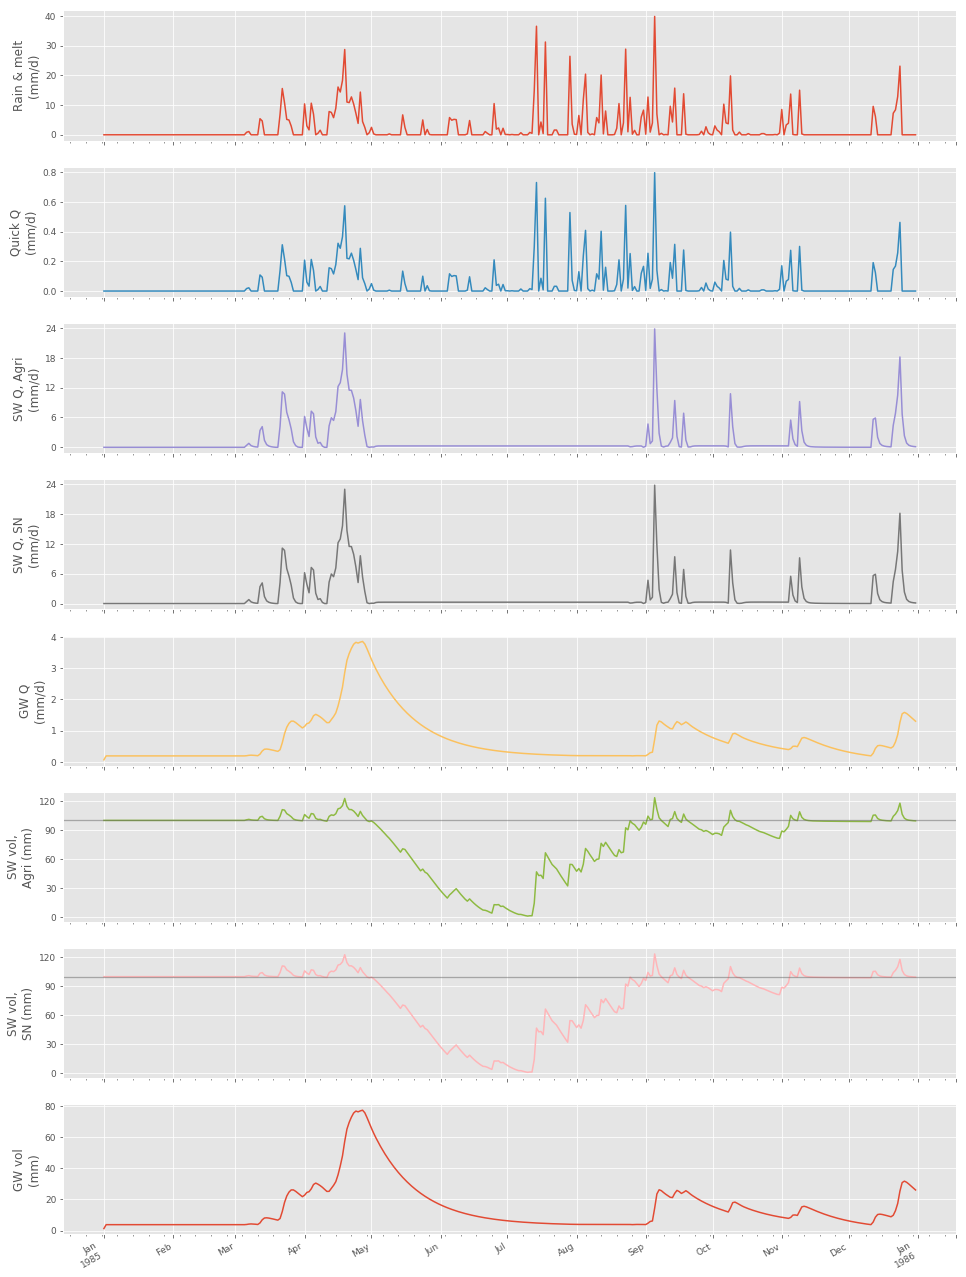

In [6]:
# Plot terrestrial
sp.plot_terrestrial(p_SU, p_SC, p, df_TC_dict, met_df, fig_display_type)

#### 4.3. Instream results

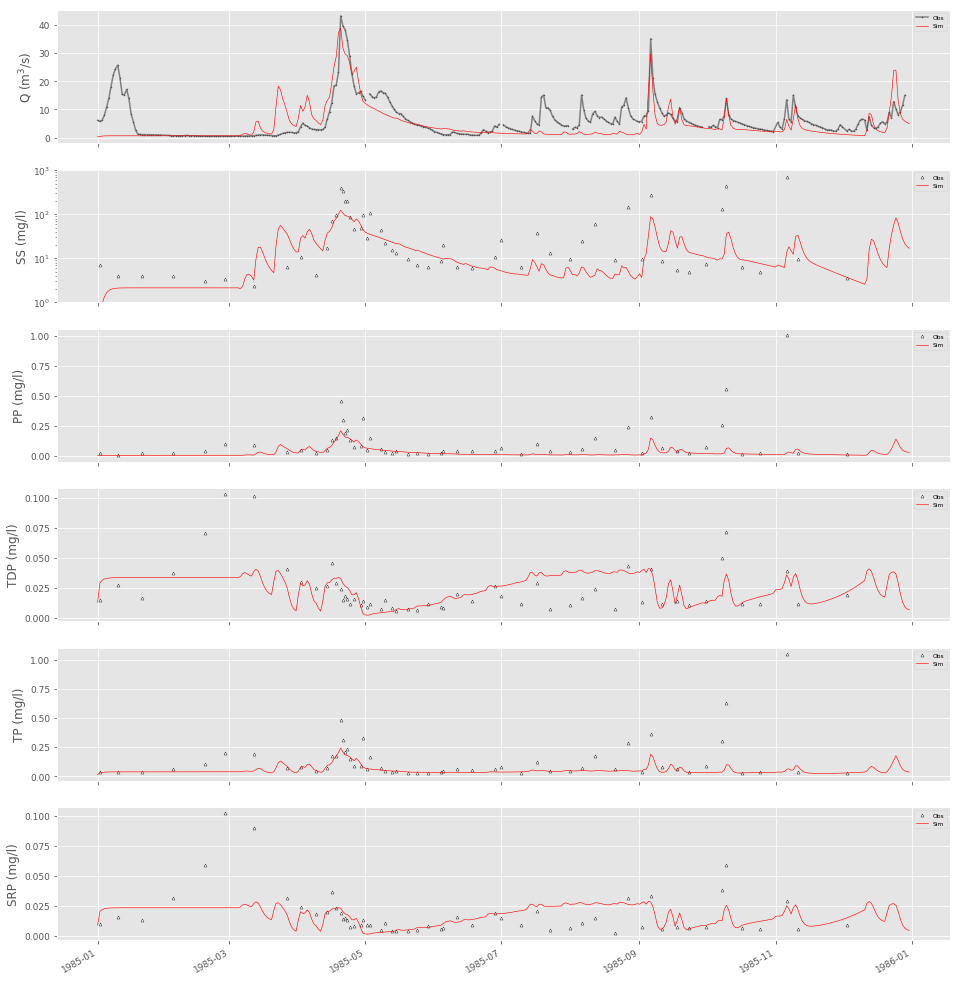

In [7]:
# Plot in-stream
# N.B. if you selected a log scale, you may get a warning if any of the simulated values are close to 0.
sp.plot_in_stream(p_SU, obs_dict, df_R_dict, fig_display_type)

#### 4.4. Calculate goodness-of-fit statistics

Statistics only calculated for reaches and parameters which have more than 10 observations.

In [8]:
# GoF summary
gof_stats = sp.goodness_of_fit_stats(p_SU, df_R_dict, obs_dict)
gof_stats

,N obs,NSE,log NSE,Spearmans r,r$^2$,Bias (%),nRMSD (%),Reach
Q,351,0.304498,-0.112388,0.430177,0.445446,-24.625003,54.093151,1
SS,57,0.074765,0.301044,0.652266,0.251409,-61.417712,38.698503,1
TDP,57,0.209167,-0.050118,0.544667,0.219879,-1.066142,57.943796,1
PP,57,-0.024930,-1.014433,0.483479,0.137832,-59.703166,44.709304,1
TP,57,0.007876,0.142028,0.611327,0.165277,-49.297061,43.259469,1
SRP,57,0.175205,-0.046881,0.478957,0.183855,-9.816441,54.043436,1
